#This week news in Astronomy:

---

https://www.sciencealert.com/did-nasa-detect-a-hint-of-life-on-venus-in-1978-and-not-realize-it

---



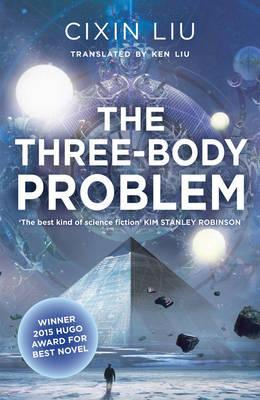
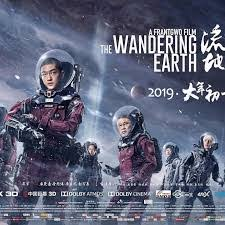
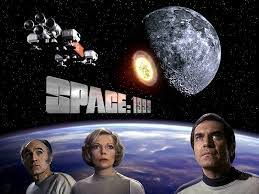

https://www.universetoday.com/148097/a-rogue-earth-mass-planet-has-been-discovered-freely-floating-in-the-milky-way-without-a-star/

----------------------------------------------

## Tensions between the early and the late Universe:
https://arxiv.org/abs/1907.10625

## First measurement of the Hubble parameter from bright binary black hole GW190521:
https://arxiv.org/abs/2009.14199




# Machine Learning applied to Gaussian Mixtures:

## The Expectation Maximization Algorithm:

Data likelihood can be a complex function of many parameters that often does not admit an easy analytic solution for MLE. In such cases, numerical methods are used to obtain model parameters and their uncertainties.

A special case of a fairly complex likelihood which can still be maximized using a relatively simple and straightforward numerical method is a mixture of Gaussians.

We first describe the model and the resulting data likelihood function, and then discuss the expectation maximization algorithm for maximizing the likelihood.

### Gaussian Mixture Model
The likelihood of a datum $x_{i}$ for a Gaussian mixture model is given by: $$p(x_{i}| \theta)= \sum_{j=1}^{M} \alpha_{j} N (\mu_{j}, \sigma_{j})$$

where dependence on $x_{i}$ comes via a Gaussian $N (\mu_{j} , \sigma_{j})$. The vector of parameters $\theta$ that need to be estimated for a given data set {$x_{i}$} includes normalization factors for each Gaussian, $\alpha_{j}$ , and its parameters $\mu_{j}$  and $\sigma_{j}$ . It is assumed that the data have
negligible uncertainties (e.g., compared to the smallest $\sigma_{j}$), and that $M$ is given. We shall see below how to relax both of these assumptions. Given that the likelihood for a single datum must be a true pdf, $\alpha_{j}$ must satisfy the normalization constraint: $$\sum_{j=1}^{M} \alpha_{j}=1$$. 

The Log likelihood for the whole data set is then: 
$$ln(L)= \sum_{i=1}^{N} ln [\sum_{j=1}^{M}\alpha_{j} N (\mu_{j}, \sigma_{j})]$$

and needs to be maximized as a function of $k = (3M − 1)$ parameters, Why?

An attempt to derive constraints on these parameters by setting partial derivatives of $ln(L)$ with respect to each parameter to zero would result in a complex system of $(3M − 1)4 nonlinear equations and would not bring us much closer to the solution
(the problem is that the logarithm is taken of the whole sum over j
classes, unlike in the case of a single Gaussian where taking the logarithm of the exponential function results in a simple quadratic function). 

We could also attempt to simply find the maximum of $ln(L)$ through an exhaustive search of the parameter space. However, even when $M$ is small, such an exhaustive search would be too time consuming, and for large $M$ it becomes impossible. For example, if the search grid for each parameter included only 10 values (typically insufficient to achieve the required
parameter accuracy), even with a relatively small $M = 5$, we would have to evaluate the function given about $10^{14}$ times!


A practical solution for maximizing lnL is to use the Levenberg–Marquardt algorithm, which combines gradient descent and Gauss–Newton optimization (see NumRec). Another possibility is to use Markov chain Monte Carlo methods. However, a much faster procedure is available, especially for the case of large $M$, based on the concept of hidden variables, as described next.

### Class Labels and Hidden Variables
The likelihood given can be interpreted using the concept of “hidden” (or missing) variables. If $M$ Gaussian components are interpreted as different “classes,” which means that a particular datum $x_{i}$ was generated by one and only one of
the individual Gaussian components, then the index j is called a “class label.” The hidden variable here is the class label j responsible for generating each $x_{i}$ . If we
knew the class label for each datum, then this maximization problem would be trivial and equivalent to examples based on a single Gaussian distribution discussed in the
previous section. That is, all the data could be sorted into M subsamples according to their class label. The fraction of points in each subsample would be an estimator of $\alpha_{j}$ , while 
$\mu_{j}$ and $\sigma_{j}$ could be trivially obtained using eqs. 3.31 and 3.32. 

In a more general case when the probability function for each class is described by a non-Gaussian function, eqs. 3.31 and 3.32 cannot be used, but given that we know the class labels the problem can still be solved and corresponds to the so-called naive
Bayesian classifier. Since the class labels are not known, for each data value we can only determine the probability that it was generated by class $j$ (sometimes called responsibility, e.g.). Given $x_{i}$ , this probability can be obtained for each class using Bayes’ rule:

$$p(j|x_{i})=\frac{\alpha_{j}N(\mu_{j}, \sigma_{j})}{\sum_{j=1}^{M} \alpha_{j}N(\mu_{j}, \sigma_{j})}$$

The class probability $p( j |x_{i} )$ is small when $x_{i}$ is not within “a few” $\sigma_{j}$ from $\mu_{j}$ (assuming that x i is close to some other mixture component). 



### The Basics of the Expectation Maximization Algorithm
Of course, we do not have to interpret eq. 4.18 in terms of classes and hidden variables. After all, $ln(L)$ is just a scalar function that needs to be maximized. However, this interpretation leads to an algorithm, called the expectation maximization (EM)
algorithm, which can be used to make this maximization fast and straightforward in practice. The EM algorithm was introduced by Dempster, Laird, and Rubin in 1977, and since then many books have been written about its various aspects (for a
good short tutorial, see https://arxiv.org/abs/1105.1476).


The key ingredient of the iterative EM algorithm is the assumption that the class probability $p( j |x_{i} )$ is known and fixed in each iteration. **The EM algorithm is not limited to
Gaussian mixtures**, so instead of $N (\mu_{j}, \sigma_{j})$ in eq. 4.18, let us use a more general pdf for each component, $p_{j} (x_{i} | \theta)$ (for notational simplicity, we do not explicitly account for the fact that $p_{j}$ includes only a subset of all $\theta$ parameters, e.g., only $μ_{j}$ and $\sigma_{j}$
are relevant for the j-th Gaussian component). By analogy with eq. 4.20, the log-likelihood is:

$$ln(L)=\sum_{i=1}^{N} ln[\sum_{j=1}^{M} \alpha_{j} p_{j}(x_{j}|\theta) ]$$

We can take a partial derivative of $ln(L)$ with respect to the parameter $\theta{j}$,

$$\frac{\delta ln(L)}{\delta \theta_{j}} = \sum_{i=1}^{N} \frac{\alpha_{j}}{\sum_{j=1}^{M} \alpha_{j}p_{j}(x_{i}|\theta)} [\frac{\delta p_{j}(x_{i}|\theta)}{\delta \theta_{j}}]$$

and we could rewrite it as:

$$\frac{\delta ln(L)}{\delta \theta_{j}} = \sum_{i=1}^{N} \frac{\alpha_{j}p_{j}(x_{i}|\theta)}{\sum_{j=1}^{M} \alpha_{j}p_{j}(x_{i}|\theta)} [\frac{1}{p_{j}(x_{i}|theta)} \frac{\delta p_{j}(x_{i}|\theta)}{\delta \theta_{j}}]  $$ 

Although this equation looks horrendous, it can be greatly simplified. The first term corresponds to the class probability given by eq. 4.21. Because it will be fixed in a
given iteration, we introduce a shorthand $w_{ij} = p( j |x_{i})$. The second term is the partial derivative of $ln[ p_{j}(x_{i}|\theta)]$. When $p_{j}(x_{i}|\theta)$ is Gaussian, it leads to particularly simple constraints for model parameters because now we take the logarithm of the exponential function before taking the derivative. Therefore:

$$\frac{\delta ln(L)}{\delta \theta_{j}} =  -\sum_{i=1}^{M} w_{ij} \frac{\delta}{\delta \theta_{j}} [ln(\sigma_{j})+\frac{(x_{i}-mu_{j})^{2}}{2 \sigma_{j}^{2}}]$$

where $\theta_{j}$ now corresponds to $\mu_{j}$ or $\sigma_{j}$ . By setting the derivatives of $ln(L)$ with respect to $\mu_{j}$ and $\sigma_{j}$ to zero, we get the estimators:

$$\mu_{j}=\frac{\sum_{i=1}^{N}w_{ij}x_{i}}{\sum_{i=1}^{N}w_{ij}}$$

$$\sigma_{j}^{2}=\frac{\sum_{i=1}^{N}w_{ij}(x_{i}-\mu_{j})^{2}}{\sum_{i=1}^{N}w_{ij}}$$

and from the normalization constraint,

$$\alpha_{j}=\frac{1}{N} \sum_{i=1}^{N}w_{ij}$$

these expresions form the basis of the iterative EM algorithm in the case of Gaussian Mixtures. Starting with a guess for $w_{ij}$ , the values of $\alpha_{j} , \mu_{j}$ , and $\sigma_{j}$
are estimated using eqs. 4.26–4.28. This is the “maximization” M-step which brings the parameters closer toward the local maximum.

In the subsequent “expectation” E-step, $w_{ij}$ are updated using eq. 4.21. The algorithm is not sensitive to the initial guess
of parameter values. For example, setting all $\sigma_{j}$ to the sample standard deviation, all $\alpha_{j}$ to $1/M$, and randomly drawing $μ_{j}$ from the observed ${x_{i}}$ values, typically works
well in practice.

Treating $w_{ij}$ as constants during the M-step may sound ad hoc, and the whole EM algorithm might look like a heuristic method. After all, the above derivation does not guarantee that the algorithm will converge. Nevertheless, the EM algorithm has a
rigorous foundation and it is provable that it will indeed find a local maximum of $ln(L)$ for a wide class of likelihood functions. In practice, however, the EM algorithm may fail due to numerical difficulties, especially when the available data are sparsely distributed, in the case of outliers, and if some
data points are repeated.






Automatically created module for IPython interactive environment


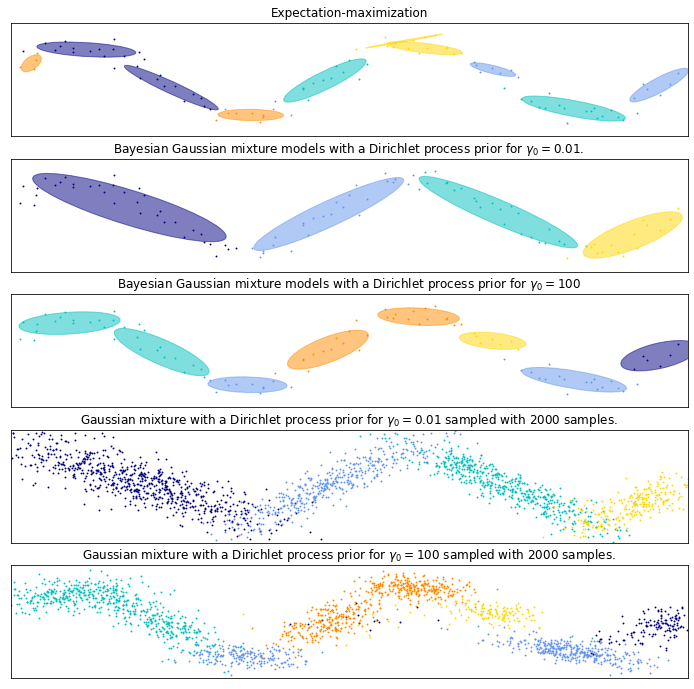

In [ ]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

print(__doc__)

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y, means, covariances, index, title):
    splot = plt.subplot(5, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-6., 4. * np.pi - 6.)
    plt.ylim(-5., 5.)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())


def plot_samples(X, Y, n_components, index, title):
    plt.subplot(5, 1, 4 + index)
    for i, color in zip(range(n_components), color_iter):
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y == i):
            continue
        plt.scatter(X[Y == i, 0], X[Y == i, 1], .8, color=color)

    plt.xlim(-6., 4. * np.pi - 6.)
    plt.ylim(-5., 5.)
    plt.title(title)
    plt.xticks(())
    plt.yticks(())


# Parameters
n_samples = 100

# Generate random sample following a sine curve
np.random.seed(0)
X = np.zeros((n_samples, 2))
step = 4. * np.pi / n_samples

for i in range(X.shape[0]):
    x = i * step - 6.
    X[i, 0] = x + np.random.normal(0, 0.1)
    X[i, 1] = 3. * (np.sin(x) + np.random.normal(0, .2))

plt.figure(figsize=(10, 10))
plt.subplots_adjust(bottom=.04, top=0.95, hspace=.2, wspace=.05,
                    left=.03, right=.97)

# Fit a Gaussian mixture with EM using ten components
gmm = mixture.GaussianMixture(n_components=10, covariance_type='full',
                              max_iter=100).fit(X)
plot_results(X, gmm.predict(X), gmm.means_, gmm.covariances_, 0,
             'Expectation-maximization')

dpgmm = mixture.BayesianGaussianMixture(
    n_components=10, covariance_type='full', weight_concentration_prior=1e-2,
    weight_concentration_prior_type='dirichlet_process',
    mean_precision_prior=1e-2, covariance_prior=1e0 * np.eye(2),
    init_params="random", max_iter=100, random_state=2).fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 1,
             "Bayesian Gaussian mixture models with a Dirichlet process prior "
             r"for $\gamma_0=0.01$.")

X_s, y_s = dpgmm.sample(n_samples=2000)
plot_samples(X_s, y_s, dpgmm.n_components, 0,
             "Gaussian mixture with a Dirichlet process prior "
             r"for $\gamma_0=0.01$ sampled with $2000$ samples.")

dpgmm = mixture.BayesianGaussianMixture(
    n_components=10, covariance_type='full', weight_concentration_prior=1e+2,
    weight_concentration_prior_type='dirichlet_process',
    mean_precision_prior=1e-2, covariance_prior=1e0 * np.eye(2),
    init_params="kmeans", max_iter=100, random_state=2).fit(X)
plot_results(X, dpgmm.predict(X), dpgmm.means_, dpgmm.covariances_, 2,
             "Bayesian Gaussian mixture models with a Dirichlet process prior "
             r"for $\gamma_0=100$")

X_s, y_s = dpgmm.sample(n_samples=2000)
plot_samples(X_s, y_s, dpgmm.n_components, 1,
             "Gaussian mixture with a Dirichlet process prior "
             r"for $\gamma_0=100$ sampled with $2000$ samples.")

plt.show()
# from:
# https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_sin.html#sphx-glr-auto-examples-mixture-plot-gmm-sin-py

### How to choose the number of classes?
We have assumed in the above discussion of the EM algorithm that the number of classes in a mixture, M, is known. As M is increased, the description of the data set {$x_{i}$} using a mixture model will steadily improve. On the other hand, a very large $M$
is undesired—after all, $M = N$ will assign a mixture component to each point in a data set. How do we choose M in practice?

Selecting an optimal M for a mixture model is a case of model selection. A basic example of this is
shown in the next figure, where the AIC and BIC are used to choose the optimal number of components to represent a simulated data set generated using a mixture of three Gaussian distributions. Using these metrics, the correct optimal M = 3 is readily recognized

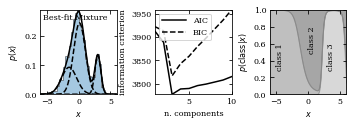

In [ ]:
"""
1D Gaussian Mixture Example
---------------------------
Figure 4.2.
Example of a one-dimensional Gaussian mixture model with three components.
The left panel shows a histogram of the data, along with the best-fit model
for a mixture with three components. The center panel shows the model selection
criteria AIC (see Section 4.3) and BIC (see Section 5.4) as a function of the
number of components. Both are minimized for a three-component model. The
right panel shows the probability that a given point is drawn from each class
as a function of its position. For a given x value, the vertical extent of
each region is proportional to that probability. Note that extreme values
are most likely to belong to class 1.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from matplotlib import pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Set up the dataset.
#  We'll create our dataset by drawing samples from Gaussians.

random_state = np.random.RandomState(seed=1)

X = np.concatenate([random_state.normal(-1, 1.5, 350),
                    random_state.normal(0, 1, 500),
                    random_state.normal(3, 0.5, 150)]).reshape(-1, 1)

#------------------------------------------------------------
# Learn the best-fit GaussianMixture models
#  Here we'll use scikit-learn's GaussianMixture model. The fit() method
#  uses an Expectation-Maximization approach to find the best
#  mixture of Gaussians for the data

# fit models with 1-10 components
N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

# compute the AIC and the BIC
AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

#------------------------------------------------------------
# Plot the results
#  We'll use three panels:
#   1) data + best-fit mixture
#   2) AIC and BIC vs number of components
#   3) probability that a point came from each component

fig = plt.figure(figsize=(5, 1.7))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)


# plot 1: data + best-fit mixture
ax = fig.add_subplot(131)
M_best = models[np.argmin(AIC)]

x = np.linspace(-6, 6, 1000)
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4)
ax.plot(x, pdf, '-k')
ax.plot(x, pdf_individual, '--k')
ax.text(0.04, 0.96, "Best-fit Mixture",
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')


# plot 2: AIC and BIC
ax = fig.add_subplot(132)
ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)


# plot 3: posterior probabilities for each component
ax = fig.add_subplot(133)

p = responsibilities
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

ax.text(-5, 0.3, 'class 1', rotation='vertical')
ax.text(0, 0.5, 'class 2', rotation='vertical')
ax.text(3, 0.3, 'class 3', rotation='vertical')

plt.show()

### The EM algorithm as a classification tool
The right panel in figure 4.2 shows the class probability for the optimal model
(M = 3) as a function of x. These results can be used to probabilistically assign all measured values $x_{i}$ to one of the three classes (mixture components).

There is no unique way to deterministically assign a class to each of the data
points because there are unknown hidden parameters. In practice, the so-called
completeness vs. contamination trade-off plays a major role in selecting classification
thresholds
.
Results analogous to the example shown in figure 4.2 can be obtained in multidimensional cases, where the mixture involves multivariate Gaussian distributions.

### How to account for measurement errors?
In the above discussion of the EM algorithm, it was assumed that measurement
errors for $x_{i}$ are negligible when compared to the smallest component width, $\sigma_{j}$.
However, in practice this assumption is often not acceptable and the best-fit $\sigma_{j}$ that
are “broadened” by measurement errors are biased estimates of “intrinsic” widths
(e.g., when measuring the widths of spectral lines).  How can we account for errors in
$x_{i}$ , given as $e_{i}$ ?

We will limit our discussion to Gaussian mixtures, and assume that measurement uncertainties, as quantified by $e_{i}$, follow a Gaussian distribution. In the case of homoscedastic errors, where all $e_{i} = e$, we can make use of the fact that the convolution of two Gaussians is a Gaussian and obtain intrinsic widths as:

$$\sigma_{j}^{*}=(\sigma_{j}^2-e^2)^{1/2}$$

This “poor-man’s” correction procedure fails in the heteroscedastic case. Furthermore, due to uncertainties in the best-fit values, it is entirely possible that the best-fit
value of $\sigma_{j}$ may turn out to be smaller than e. An expectation maximization
approach to Gaussian mixture models in the presence of errors is also called extreme deconvolution in the context of clustering
and density estimation. http://fab.cba.mit.edu/classes/864.20/text/dense.pdf

### Non-Gaussian mixture models
The EM algorithm is not confined to Gaussian mixtures. As eq. 4.24 shows, the
basic premise of the method can be derived for any mixture model.  A major benefit of Gaussian pdfs is the very simple set of explicit equations (eqs. 4.26–4.28) for updating model parameters.

When other pdfs are used, a variety of techniques are proposed in the literature for
implementation of the maximization M-step. For cases where Gaussian mixtures
are insufficient descriptors of data, we recommend consulting abundant and easily
accessible literature on the various forms of the EM algorithm. https://www.inference.org.uk/itprnn/book.pdf

https://www.jpl.nasa.gov/news/news.php?release=2020-188

https://sites.google.com/view/optativas-diplodatos-2020/home

https://astrostatistics.psu.edu/

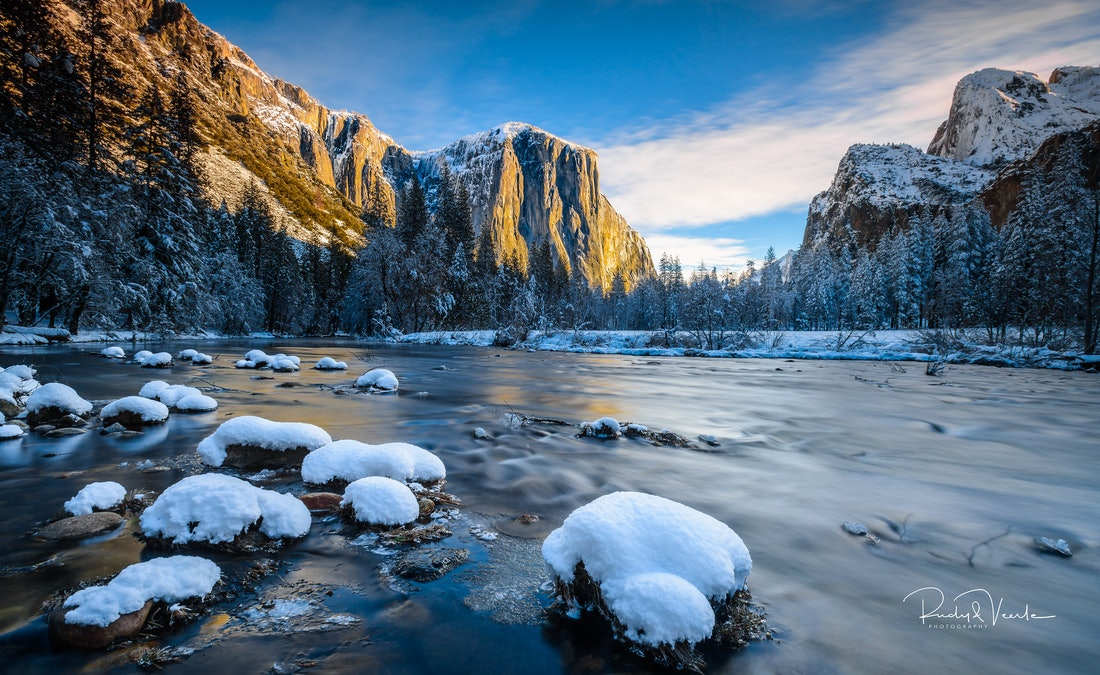

# Confidence Estimates: the Bootstrap and the Jackknife
Most standard expressions for computing confidence limits for estimated parameters
are based on fairly strong assumptions, such as Gaussianity and large samples.
Fortunately, there are two alternative methods for computing confidence limits that
are general, powerful, and easy to implement. Compared to the rest of statistics, they
are relatively new and are made possible by the advent of cheap computing power.
Both rely on resampling of the data set ${x_{i}}$.

Our data set ${x_{i}}$ is drawn from some distribution function $h(x)$. If we knew $h(x)$
perfectly well, we could compute any statistic without uncertainty (e.g., we could
draw a large sample from $h(x)$ and, e.g., compute the mean). However, we do not
know $h(x)$, and the best we can do are computations which rely on various estimates
of $h(x)$ derived from the data, which we call here $f(x)$. Bootstrapping is based on the approximation:

$$f(x)=\frac{1}{N}\sum_{i=1}^{N}\delta(x-x_{i})$$

where $\delta(x)$ is the Dirac $\delta$ function. The function $f(x)$ maximizes the probability of obtaining observed data values ( $f$ is a maximum likelihood estimator of $h$.
 We can now pretend that $f(x)$ is actually $h(x)$, and use it to perform various computations. For example, we could use eq. 4.32 to estimate the mean and its uncertainty.

When determining parameter uncertainties in practice, we use eq. 4.32 to draw
an almost arbitrary number of new data sets. There are N! possible distinct samples
of size N and the probability that a new data set is identical to the original data set
is $N!/N^{n}$ (even for a small N, this probability is small, e.g., for N = 10 it is only
0.00036). In other words, we draw from the observed data set with replacement: select
N new index values j from the range i = 1, . . . , N, and this is your new sample
(some values from {$x_{i}$} can appear twice or more times in the resampled data set).

This resampling is done B times, and the resulting B data sets are used to compute
the statistic of interest B times. The distribution of these values maps the uncertainty
of the statistics of interest and can be used to estimate its bias and standard error, as
well as other statistics.

The bootstrap method was proposed by Efron in 1979; The bootstrap method described above
is called the nonparametric bootstrap; there is also the parametric bootstrap method
which draws samples from the best-fit model. According to Wall and Jenkins,
Efron named this method after “the image of lifting oneself up by one’s own
bootstraps.” The nonparametric bootstrap method is especially useful when errors
for individual data values are not independent (e.g., cumulative histogram, or two-
point correlation function). Nevertheless, astronomers sometimes misuse
the bootstrap idea and ignore nontrivial implementation considerations
in complex problems; for example, the treatment in NumRec is misleadingly simple
(for a detailed discussion of recent developments in bootstrap methodology and an
excellent reference list, see https://www.researchgate.net/publication/38384837_Recent_Developments_in_Bootstrap_Methodology)


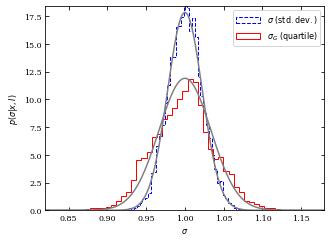

In [ ]:
r"""
Bootstrap Calculations of Error on Mean
---------------------------------------
Figure 4.3.
The bootstrap uncertainty estimates for the sample standard deviation
:math:`\sigma` (dashed line; see eq. 3.32) and :math:`\sigma_G` (solid line;
see eq. 3.36). The sample consists of N = 1000 values drawn from a Gaussian
distribution with :math:`\mu = 0` and :math:`\sigma = 1`. The bootstrap
estimates are based on 10,000 samples. The thin lines show Gaussians with
the widths determined as :math:`s / \sqrt{2(N - 1)}` (eq. 3.35) for
:math:`\sigma` and :math:`1.06 s / \sqrt{N}` (eq. 3.37) for :math:`\sigma_G`.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.resample import bootstrap
from astroML.stats import sigmaG

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

m = 1000  # number of points
n = 10000  # number of bootstraps

#------------------------------------------------------------
# sample values from a normal distribution
np.random.seed(123)
data = norm(0, 1).rvs(m)

#------------------------------------------------------------
# Compute bootstrap resamplings of data
mu1_bootstrap = bootstrap(data, n,  np.std, kwargs=dict(axis=1, ddof=1))
mu2_bootstrap = bootstrap(data, n, sigmaG, kwargs=dict(axis=1))

#------------------------------------------------------------
# Compute the theoretical expectations for the two distributions
x = np.linspace(0.8, 1.2, 1000)

sigma1 = 1. / np.sqrt(2 * (m - 1))
pdf1 = norm(1, sigma1).pdf(x)

sigma2 = 1.06 / np.sqrt(m)
pdf2 = norm(1, sigma2).pdf(x)

#------------------------------------------------------------
# Plot the results
fig, ax = plt.subplots(figsize=(5, 3.75))

ax.hist(mu1_bootstrap, bins=50, density=True, histtype='step',
        color='blue', ls='dashed', label=r'$\sigma\ {\rm (std. dev.)}$')
ax.plot(x, pdf1, color='gray')

ax.hist(mu2_bootstrap, bins=50, density=True, histtype='step',
        color='red', label=r'$\sigma_G\ {\rm (quartile)}$')
ax.plot(x, pdf2, color='gray')

ax.set_xlim(0.82, 1.18)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$p(\sigma|x,I)$')

ax.legend()

plt.show()

The jackknife method, invented by Tukey in 1958, is similar in spirit to the bootstrap method (the name jackknife implies robustness and
general applicability). Rather than drawing a data set of the same size as the original
data set during the resampling step, one or more observations are left unused when computing the statistic of interest. Let us call this statistic $\alpha$ with its value computed
from the full data set $\alpha_{N}$ . Assuming that one observation (data value) is removed
when resampling, we can form N such data sets, and compute a statistic of interest, $\alpha_{i}^{∗}$ , for each of them. It can be shown that in the case of a single observation removed
from the data set, a bias-corrected jackknife estimate of $\alpha$ can be compute as:

$$\alpha^{J}=\alpha_{N}-\Delta \alpha$$

where the jacknife correction is:

$$\Delta \alpha= (N-1)(\alpha_{N}-\frac{1}{N}\sum_{i=1}^{N}\alpha_{i}^{*})$$

for estimators which are asymptotically normal, the standard error for a jackknife estimate $\alpha^{J}$ is

$$\sigma_{\alpha}=\sqrt{\frac{1}{N(N-1)}\sum_{i=1}^{N}[N\alpha_{N}-\alpha^{J}-(N-1)\alpha_{i}^{*}]^{2}}$$

The confidence limits for $\alpha$ can be computed using Student’s t distribution  with $t = (\alpha − \alpha^{J})/\sigma_{\alpha}$ and $N-1$  degrees of freedom. The jackknife standard
error is more reliable than the jackknife bias correction because it is based on a simpler approximation.



0.597747861971019 0.031353107946452324
mu_1 mean: 1.00 +- 0.02
mu_2 mean: 0.60 +- 0.03


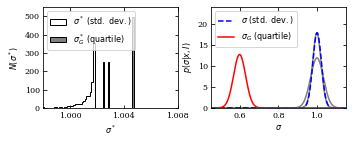

In [ ]:
r"""
Jackknife Calculations of Error on Mean
---------------------------------------
Figure 4.4.
The jackknife uncertainty estimates for the width of a Gaussian distribution.
This example uses the same data as figure 4.3. The upper panel shows a
histogram of the widths determined using the sample standard deviation, and
using the interquartile range. The lower panel shows the corrected jackknife
estimates (eqs. 4.33 and 4.35) for the two methods. The gray lines show the
theoretical results, given by eq. 3.35 for :math:`\sigma` and eq. 3.37 for
:math:`\sigma_G`. The result for :math:`\sigma` matches the theoretical
result almost exactly, but note the failure of the jackknife to correctly
estimate :math:`\sigma_G` (see the text for a discussion of this result).
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from __future__ import print_function, division

import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# sample values from a normal distribution
np.random.seed(123)
m = 1000  # number of points
data = norm(0, 1).rvs(m)

#------------------------------------------------------------
# Compute jackknife resamplings of data
from astroML.resample import jackknife
from astroML.stats import sigmaG

# mu1 is the mean of the standard-deviation-based width
mu1, sigma_mu1, mu1_raw = jackknife(data, np.std,
                                    kwargs=dict(axis=1, ddof=1),
                                    return_raw_distribution=True)

pdf1_theory = norm(1, 1. / np.sqrt(2 * (m - 1)))
pdf1_jackknife = norm(mu1, sigma_mu1)

# mu2 is the mean of the interquartile-based width
#  WARNING: do not use the following in practice.  This example
#           shows that jackknife fails for rank-based statistics.
mu2, sigma_mu2, mu2_raw = jackknife(data, sigmaG,
                                    kwargs=dict(axis=1),
                                    return_raw_distribution=True)
pdf2_theory = norm(data.std(), 1.06 / np.sqrt(m))
pdf2_jackknife = norm(mu2, sigma_mu2)
print(mu2, sigma_mu2)

#------------------------------------------------------------
# plot the results
print("mu_1 mean: %.2f +- %.2f" % (mu1, sigma_mu1))
print("mu_2 mean: %.2f +- %.2f" % (mu2, sigma_mu2))

fig = plt.figure(figsize=(5, 2))
fig.subplots_adjust(left=0.11, right=0.95, bottom=0.2, top=0.9,
                    wspace=0.25)

ax = fig.add_subplot(121)
ax.hist(mu1_raw, np.linspace(0.996, 1.008, 100),
        label=r'$\sigma^*\ {\rm (std.\ dev.)}$',
        histtype='stepfilled', fc='white', ec='black', density=False)
ax.hist(mu2_raw, np.linspace(0.996, 1.008, 100),
        label=r'$\sigma_G^*\ {\rm (quartile)}$',
        histtype='stepfilled', fc='gray', density=False)
ax.legend(loc='upper left', handlelength=2)

ax.xaxis.set_major_locator(plt.MultipleLocator(0.004))
ax.set_xlabel(r'$\sigma^*$')
ax.set_ylabel(r'$N(\sigma^*)$')
ax.set_xlim(0.998, 1.008)
ax.set_ylim(0, 550)

ax = fig.add_subplot(122)
x = np.linspace(0.45, 1.15, 1000)
ax.plot(x, pdf1_jackknife.pdf(x),
        color='blue', ls='dashed', label=r'$\sigma\ {\rm (std.\ dev.)}$',
        zorder=2)
ax.plot(x, pdf1_theory.pdf(x), color='gray', zorder=1)
ax.plot(x, pdf2_jackknife.pdf(x),
        color='red', label=r'$\sigma_G\ {\rm (quartile)}$', zorder=2)
ax.plot(x, pdf2_theory.pdf(x), color='gray', zorder=1)
plt.legend(loc='upper left', handlelength=2)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$p(\sigma|x,I)$')
ax.set_xlim(0.45, 1.15)
ax.set_ylim(0, 24)

plt.show()

This failure is a general problem with the standard jackknife method, which performs well for smooth differential statistics such as the mean and standard deviation, but does not perform well for medians, quantiles, and other rank-based statistics. For these sorts of statistics, a jackknife implementation that removes more than one observation can overcome this problem.

Should one use bootstrap or jackknife in practice? Although based on different
approximations, they typically produce similar results for smooth statistics, especially
for large samples. Jackknife estimates are usually easier to calculate, easier to apply
to complex sampling schemes, and they also automatically remove bias. However,
bootstrap is better for computing confidence intervals because it does not involve the
assumption of asymptotic normality (i.e., it maps out the shape of the distribution).
Note that bootstrap gives slightly different results even if the data set is fixed (because
random resampling is performed), while jackknife gives repeatable results for a given
data set (because all possible permutations are used). Of course, when feasible, it
is prudent to use both bootstrap and jackknife and critically compare their results.
Both methods should be used with caution when N is small.

In [ ]:
def jackknife(x, func):
    """Jackknife estimate of the estimator func"""
    n = len(x)
    idx = np.arange(n)
    return np.sum(func(x[idx!=i]) for i in range(n))/float(n)

In [ ]:
# Jackknife estimate of standard deviation
x = np.random.normal(0, 1, 1000)
jackknife(x, np.std)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """


0.9580088153727132

In [ ]:
def jackknife_var(x, func):
    """Jackknife estimate of the variance of the estimator func."""
    n = len(x)
    idx = np.arange(n)
    j_est = jackknife(x, func)
    return (n-1)/(n + 0.0) * np.sum((func(x[idx!=i]) - j_est)**2.0 for i in range(n))

In [ ]:
# estimate of the variance of an estimator
jackknife_var(x, np.std)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


0.0004972935579268735

In [ ]:
import numpy as np
from astroML.resample import jackknife
x = np.random.normal( loc = 0 , scale = 1 , size = 1000 )
jackknife(x , np . std , kwargs = dict( ddof = 1 , axis = 1 ) )

(1.0077699262800075, 0.02073487795315487)

# Hypothesis Testing
A common problem in statistics is to ask whether a given sample is consistent with some hypothesis. For example, we might be interested in whether a measured value $x_{i}$ , or the whole set {$x_{i}$}, is consistent with being drawn from a Gaussian distribution $N(\mu, \sigma)$. Here $N(\mu, \sigma)$ is our null hypothesis, typically corresponding
to a “no effect” case, and we are trying to reject it in order to demonstrate that
we measured some effect. A good example from astronomy is the source detection in images with substantial background (e.g., atmospheric sky brightness in optical images). Because the background fluctuates, the contribution of the source flux to a particular image resolution element must be substantially larger than the background fluctuation to represent a robust detection. Here, the null hypothesis is that the
measured brightness in a given resolution element is due to background, and when
we can reject it, we have a source detection. It is always assumed that we know how to compute the probability of a given outcome from the null hypothesis: for example, given the cumulative distribution function, $0 ≤ H_{0} (x) ≤ 1$ , the
probability that we would get a value at least as large as $x_{i}$ is $p(x > x_{i} ) = 1 − H(x _{i})$, and is called the $p$ value. Typically, a threshold p value is adopted, called the
significance level $\alpha$, and the null hypothesis is rejected when $p ≤ \alpha$ (e.g., if $\alpha = 0.05$ and $p < 0.05$, the null hypothesis is rejected at a $0.05$ significance level). If we fail to reject a hypothesis, it does not mean that we proved its correctness because it may be that our sample is simply not large enough to detect an effect.


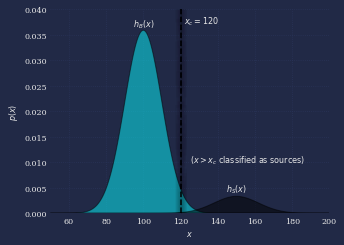

In [ ]:
"""
Example of classification
-------------------------
Figure 4.5.
An example of a simple classification problem between two Gaussian
distributions. Given a value of x, we need to assign that measurement to one
of the two distributions (background vs. source). The cut at xc = 120 leads
to very few Type II errors (i.e., false negatives: points from the distribution
hS with x < xc being classified as background), but this comes at the cost of
a significant number of Type I errors (i.e., false positives: points from the
distribution :math:`h_B` with x > xc being classified as sources).
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import mplcyberpunk

plt.style.use("cyberpunk")

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Generate and draw the curves
x = np.linspace(50, 200, 1000)
p1 = 0.9 * norm(100, 10).pdf(x)
p2 = 0.1 * norm(150, 12).pdf(x)

fig, ax = plt.subplots(figsize=(5, 3.75))
ax.fill(x, p1, ec='k', alpha=0.5)
ax.fill(x, p2, '-k', alpha=0.5)

ax.plot([120, 120], [0.0, 0.04], '--k')

ax.text(100, 0.036, r'$h_B(x)$', ha='center', va='bottom')
ax.text(150, 0.0035, r'$h_S(x)$', ha='center', va='bottom')
ax.text(122, 0.039, r'$x_c=120$', ha='left', va='top')
ax.text(125, 0.01, r'$(x > x_c\ {\rm classified\ as\ sources})$')

ax.set_xlim(50, 200)
ax.set_ylim(0, 0.04)

ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
mplcyberpunk.add_glow_effects(ax)
#mplcyberpunk.make_lines_glow(ax)
mplcyberpunk.add_underglow(ax)
plt.show()

Read the following article: https://arxiv.org/abs/astro-ph/0107034

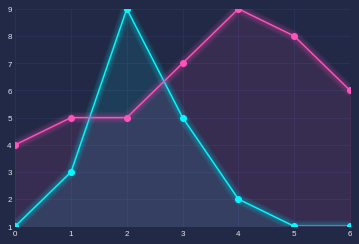

In [ ]:
plt.style.use("cyberpunk")

plt.plot([1, 3, 9, 5, 2, 1, 1], marker='o')
plt.plot([4, 5, 5, 7, 9, 8, 6], marker='o')

mplcyberpunk.add_glow_effects()

plt.show()

In [ ]:
!pip install astroML

     |████████████████████████████████| 112kB 2.8MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-cp36-none-any.whl size=128663 sha256=c4e3f1fee0d88507e72b2c818608a551bb787dc6a3b421f1811e86e0c0567982
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroML


In [ ]:
! sudo apt-get install texlive-latex-recommended 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  libpotrace0 libptexenc1 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13
  lmodern poppler-data t1utils tex-common texlive-base texlive-binaries
  texlive-latex-base
Suggested packages:
  fonts-noto poppler-utils ghostscript fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum debhelper gv
  | postscript-viewer perl-tk xpdf-reader | pdf-viewer texlive-latex-base-doc
  texlive-latex-recommended-doc texlive-pstricks
The following NEW packages will be installed:
  fonts-droid-fallback fonts-lmodern fonts-noto-mono libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 libkpathsea6
  lib

In [ ]:
!sudo apt-get install cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal pfb2t1c2pfb
The following NEW packages will be installed:
  cm-super cm-super-minimal pfb2t1c2pfb
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 24.5 MB of archives.
After this operation, 59.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cm-super-minimal all 0.3.4-11 [5,810 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 pfb2t1c2pfb amd64 0.3-11 [9,342 B]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 cm-super all 0.3.4-11 [18.7 MB]
Fetched 24.5 MB in 4s (5,584 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 3.)
debconf: falling back to fro

In [ ]:
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
! unzip type1cm.zip -d /tmp/type1cm 
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
! sudo texhash 

--2020-10-03 17:50:33--  http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip
Resolving mirrors.ctan.org (mirrors.ctan.org)... 5.35.249.60
Connecting to mirrors.ctan.org (mirrors.ctan.org)|5.35.249.60|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mirrors.concertpass.com/tex-archive/macros/latex/contrib/type1cm.zip [following]
--2020-10-03 17:50:35--  https://mirrors.concertpass.com/tex-archive/macros/latex/contrib/type1cm.zip
Resolving mirrors.concertpass.com (mirrors.concertpass.com)... 162.219.248.112
Connecting to mirrors.concertpass.com (mirrors.concertpass.com)|162.219.248.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 328566 (321K) [application/zip]
Saving to: ‘type1cm.zip’

type1cm.zip         100%[===================>] 320.87K   251KB/s    in 1.3s    

2020-10-03 17:50:37 (251 KB/s) - ‘type1cm.zip’ saved [328566/328566]

Archive:  type1cm.zip
   creating: /tmp/type1cm/type1cm/
  inflating: /tmp/type1cm/t

In [ ]:
!pip install mplcyberpunk